# Appendix III
## Data Processing
We gathered 3 seasons of statistics for NBA players who played for Golden State Worriers, Dallas Mavericks and LA Lakers in 2021 season, including their Team, position, height, weight, the year they born to calculate age, average time played per game, and RPM (Real Plus-Minus) which indicates overall how well they played. 

We will use height, weight, age, and average time played to calculate their physical limitation, and RPM and average time played to calculate fantasy point which can be interpreted as their contribution to the team.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nba_stats = pd.read_csv('nba_stats.csv')
nba_stats

,Player,Team,Pos,Height,Weight,Born_year,Season,Time,RPM
0,Andre Iguodala,GSW,G,1.98,215,1984,2021,20.4,9.4
1,Andrew Wiggins,GSW,F,2.01,197,1995,2021,29.1,5.4
2,Chris Chiozza,GSW,G,1.80,175,1995,2021,8.9,0.3
3,Damion Lee,GSW,G,1.96,210,1992,2021,24.1,3.3
4,Draymond Green,GSW,F,1.98,230,1990,2021,30.5,7.7
...,...,...,...,...,...,...,...,...,...
118,Reggie Bullock,DAL,G,1.98,205,1991,2019,23.6,-2.7
119,Sterling Brown,DAL,G,1.96,219,1995,2019,14.7,1.3
120,Tim Hardaway Jr.,DAL,G,1.96,205,1992,2019,29.5,4.1
121,Trey Burke,DAL,G,1.83,185,1992,2019,15.8,0.8


In [2]:
GSW = nba_stats[nba_stats['Team'] == "GSW"]
DAL = nba_stats[nba_stats['Team'] == "DAL"]
LAL = nba_stats[nba_stats['Team'] == "LAL"]


In [3]:
GSW_player = GSW.loc[:, ['Player', 'Pos', 'Height', 'Weight', 'Born_year']][GSW.loc[:, ['Player', 'Team']].duplicated().apply(lambda x:not x)].reset_index(drop=True)
DAL_player = DAL.loc[:, ['Player', 'Pos', 'Height', 'Weight', 'Born_year']][DAL.loc[:, ['Player', 'Team']].duplicated().apply(lambda x:not x)].reset_index(drop=True)
LAL_player = LAL.loc[:, ['Player', 'Pos', 'Height', 'Weight', 'Born_year']][LAL.loc[:, ['Player', 'Team']].duplicated().apply(lambda x:not x)].reset_index(drop=True)

GSW_player



,Player,Pos,Height,Weight,Born_year
0,Andre Iguodala,G,1.98,215,1984
1,Andrew Wiggins,F,2.01,197,1995
2,Chris Chiozza,G,1.80,175,1995
3,Damion Lee,G,1.96,210,1992
4,Draymond Green,F,1.98,230,1990
5,Gary Payton II,G,1.91,195,1992
6,Jeff Dowtin,G,1.91,177,1997
7,Jonathan Kuminga,C,2.01,225,2002
8,Jordan Poole,G,1.93,194,1999
9,Juan Toscano-Anderson,F,1.98,209,1993


In [4]:
GSW_stats = GSW[['Player', 'Time', 'RPM']].groupby(by='Player').mean().round(2).reset_index()
DAL_stats = DAL[['Player', 'Time', 'RPM']].groupby(by='Player').mean().round(2).reset_index()
LAL_stats = LAL[['Player', 'Time', 'RPM']].groupby(by='Player').mean().round(2).reset_index()
GSW_stats

,Player,Time,RPM
0,Andre Iguodala,20.53,2.30
1,Andrew Wiggins,32.27,0.57
2,Chris Chiozza,11.27,1.30
3,Damion Lee,24.00,0.50
4,Draymond Green,30.13,2.33
5,Gary Payton II,14.77,1.50
6,Jeff Dowtin,2.90,-0.50
7,Jonathan Kuminga,4.70,-0.40
8,Jordan Poole,23.50,0.90
9,Juan Toscano-Anderson,18.53,-1.03


Player with longer average play time may contribute to the team. For example, Stephen Curry with Time 31.90 and RPM 2.4 may contribute more to the team than Sekou Doumbouya with Time 14.47 and RPM 3.33.
So we want average time have a positive effect on the fantasy point. 

In [5]:
#Normalize stats for each team seperately.

GSW_stats['Time_norm'] = round((GSW_stats['Time'] - GSW_stats['Time'].min())/(GSW_stats['Time'].max() - GSW_stats['Time'].min()) + 0.01,2)
GSW_stats['RPM'] = round((GSW_stats['RPM'] - GSW_stats['RPM'].mean())/(GSW_stats['RPM'].max() - GSW_stats['RPM'].min())+ 0.01,2)
LAL_stats['Time_norm'] = round((LAL_stats['Time'] - LAL_stats['Time'].min())/(LAL_stats['Time'].max() - LAL_stats['Time'].min())+ 0.01,2)
LAL_stats['RPM'] = round((LAL_stats['RPM'] - LAL_stats['RPM'].mean())/(LAL_stats['RPM'].max() - LAL_stats['RPM'].min())+ 0.01,2)
DAL_stats['Time_norm'] = round((DAL_stats['Time'] - DAL_stats['Time'].min())/(DAL_stats['Time'].max() - DAL_stats['Time'].min())+ 0.01, 2)
DAL_stats['RPM'] = round((DAL_stats['RPM'] - DAL_stats['RPM'].mean())/(DAL_stats['RPM'].max() - DAL_stats['RPM'].min())+ 0.01,2)

# Calculate the fantasy point as time ** 0.5 * 5 + RPM * 5

GSW_stats['Fantasy_point'] = round(GSW_stats['Time']**(1/2)*0.5 + GSW_stats['RPM'] * 4, 2)
LAL_stats['Fantasy_point'] = round(LAL_stats['Time']**(1/2)*0.5 + LAL_stats['RPM'] * 4, 2)
DAL_stats['Fantasy_point'] = round(DAL_stats['Time']**(1/2)*0.5 + DAL_stats['RPM'] * 4, 2)
GSW_stats

,Player,Time,RPM,Time_norm,Fantasy_point
0,Andre Iguodala,20.53,0.35,0.61,3.67
1,Andrew Wiggins,32.27,-0.09,1.01,2.48
2,Chris Chiozza,11.27,0.09,0.29,2.04
3,Damion Lee,24.00,-0.11,0.73,2.01
4,Draymond Green,30.13,0.35,0.94,4.14
5,Gary Payton II,14.77,0.15,0.41,2.52
6,Jeff Dowtin,2.90,-0.36,0.01,-0.59
7,Jonathan Kuminga,4.70,-0.33,0.07,-0.24
8,Jordan Poole,23.50,-0.01,0.71,2.38
9,Juan Toscano-Anderson,18.53,-0.49,0.54,0.19


In [6]:
GSW_player[['Time', 'Fantasy_point']] = GSW_stats[['Time', 'Fantasy_point']]
LAL_player[['Time', 'Fantasy_point']] = LAL_stats[['Time', 'Fantasy_point']]
DAL_player[['Time', 'Fantasy_point']] = DAL_stats[['Time', 'Fantasy_point']]


In [7]:
# We estimate the time_limit of each player by assuming high BMI and age will negatively affect the time they can play.
# And we will take the time_limit as the larger one of estimated time and average time they played. 

GSW_player['Age'] = 2021 - GSW_player['Born_year']
GSW_player['BMI'] = round(GSW_player['Weight'] / GSW_player['Height']/100, 2)
time_factor = 48/GSW_player['Time'].max()
GSW_player['Time_limit'] = GSW_player[['Time', 'BMI', 'Age']].apply(lambda x:round(max(20 - (x['Age']-24)*0.7 - (x['BMI']-1)*30, x['Time'])*time_factor,2), axis=1)

LAL_player['Age'] = 2021 - LAL_player['Born_year']
LAL_player['BMI'] = round(LAL_player['Weight'] / LAL_player['Height']/100, 2)
time_factor = 48/LAL_player['Time'].max()
LAL_player['Time_limit'] = LAL_player[['Time', 'BMI', 'Age']].apply(lambda x:round(max(20 - (x['Age']-24)*0.7 - (x['BMI']-1)*30, x['Time'])*time_factor,2), axis=1)

DAL_player['Age'] = 2021 - DAL_player['Born_year']
DAL_player['BMI'] = round(DAL_player['Weight'] / DAL_player['Height']/100, 2)
time_factor = 48/DAL_player['Time'].max()
DAL_player['Time_limit'] = DAL_player[['Time', 'BMI', 'Age']].apply(lambda x:round(max(20 - (x['Age']-24)*0.7 - (x['BMI']-1)*30, x['Time'])*time_factor,2), axis=1)

DAL_player

,Player,Pos,Height,Weight,Born_year,Time,Fantasy_point,Age,BMI,Time_limit
0,Boban Marjanovic,C,2.21,290,1988,8.43,2.05,33,1.31,11.84
1,Dorian Finney-Smith,F,2.01,220,1993,31.10,3.03,28,1.09,43.69
2,Dwight Powell,F,2.08,140,1991,22.33,2.40,30,0.67,36.10
3,Eugene Omoruyi,F,1.98,235,1997,5.20,1.22,24,1.19,20.09
4,Frank Ntilikina,G,1.93,200,1998,14.87,1.61,23,1.04,27.39
5,JaQuori McLaughlin,G,1.93,190,1998,1.70,1.01,23,0.98,29.92
6,Jalen Brunson,G,1.85,190,1996,23.83,4.16,25,1.03,33.47
7,Josh Green,G,1.96,200,2000,8.60,2.03,21,1.02,30.20
8,Kristaps Porzingis,F,2.21,240,1995,29.67,2.48,26,1.09,41.68
9,Luka Doncic,F,2.01,230,1999,34.17,2.60,22,1.14,48.00


In [8]:
GSW_player['s'] = round(GSW_player['Fantasy_point']/GSW_player['Time_limit'],3).apply(lambda x: 0.03 if x <= 0 else x)
LAL_player['s'] = round(LAL_player['Fantasy_point']/LAL_player['Time_limit'],3).apply(lambda x: 0.03 if x <= 0 else x)
DAL_player['s'] = round(DAL_player['Fantasy_point']/DAL_player['Time_limit'],3).apply(lambda x: 0.03 if x <= 0 else x)

GSW_player['v'] = GSW_player[['s', 'Age']].apply(lambda x: min(max(x['s']-(x['Age']-25)/200, 0.03), x['s']), axis=1)
LAL_player['v'] = LAL_player[['s', 'Age']].apply(lambda x: min(max(x['s']-(x['Age']-25)/200, 0.03), x['s']), axis=1)
DAL_player['v'] = DAL_player[['s', 'Age']].apply(lambda x: min(max(x['s']-(x['Age']-25)/200, 0.03), x['s']), axis=1)

GSW_player


,Player,Pos,Height,Weight,Born_year,Time,Fantasy_point,Age,BMI,Time_limit,s,v
0,Andre Iguodala,G,1.98,215,1984,20.53,3.67,37,1.09,30.54,0.120,0.060
1,Andrew Wiggins,F,2.01,197,1995,32.27,2.48,26,0.98,48.00,0.052,0.047
2,Chris Chiozza,G,1.80,175,1995,11.27,2.04,26,0.97,29.01,0.070,0.065
3,Damion Lee,G,1.96,210,1992,24.00,2.01,29,1.07,35.70,0.056,0.036
4,Draymond Green,F,1.98,230,1990,30.13,4.14,31,1.16,44.82,0.092,0.062
5,Gary Payton II,G,1.91,195,1992,14.77,2.52,29,1.02,23.65,0.107,0.087
6,Jeff Dowtin,G,1.91,177,1997,2.90,-0.59,24,0.93,32.87,0.030,0.030
7,Jonathan Kuminga,C,2.01,225,2002,4.70,-0.24,19,1.12,29.60,0.030,0.030
8,Jordan Poole,G,1.93,194,1999,23.50,2.38,22,1.01,34.96,0.068,0.068
9,Juan Toscano-Anderson,F,1.98,209,1993,18.53,0.19,28,1.06,27.56,0.007,0.007


In [9]:
GSW_player.drop(columns=['Height', 'Weight', 'Born_year', 'Time', 'Age', 'BMI'], inplace=True)
LAL_player.drop(columns=['Height', 'Weight', 'Born_year', 'Time', 'Age', 'BMI'], inplace=True)
DAL_player.drop(columns=['Height', 'Weight', 'Born_year', 'Time', 'Age', 'BMI'], inplace=True)


In [10]:
GSW_player.to_csv('GSW2.csv')
GSW_player

,Player,Pos,Fantasy_point,Time_limit,s,v
0,Andre Iguodala,G,3.67,30.54,0.120,0.060
1,Andrew Wiggins,F,2.48,48.00,0.052,0.047
2,Chris Chiozza,G,2.04,29.01,0.070,0.065
3,Damion Lee,G,2.01,35.70,0.056,0.036
4,Draymond Green,F,4.14,44.82,0.092,0.062
5,Gary Payton II,G,2.52,23.65,0.107,0.087
6,Jeff Dowtin,G,-0.59,32.87,0.030,0.030
7,Jonathan Kuminga,C,-0.24,29.60,0.030,0.030
8,Jordan Poole,G,2.38,34.96,0.068,0.068
9,Juan Toscano-Anderson,F,0.19,27.56,0.007,0.007


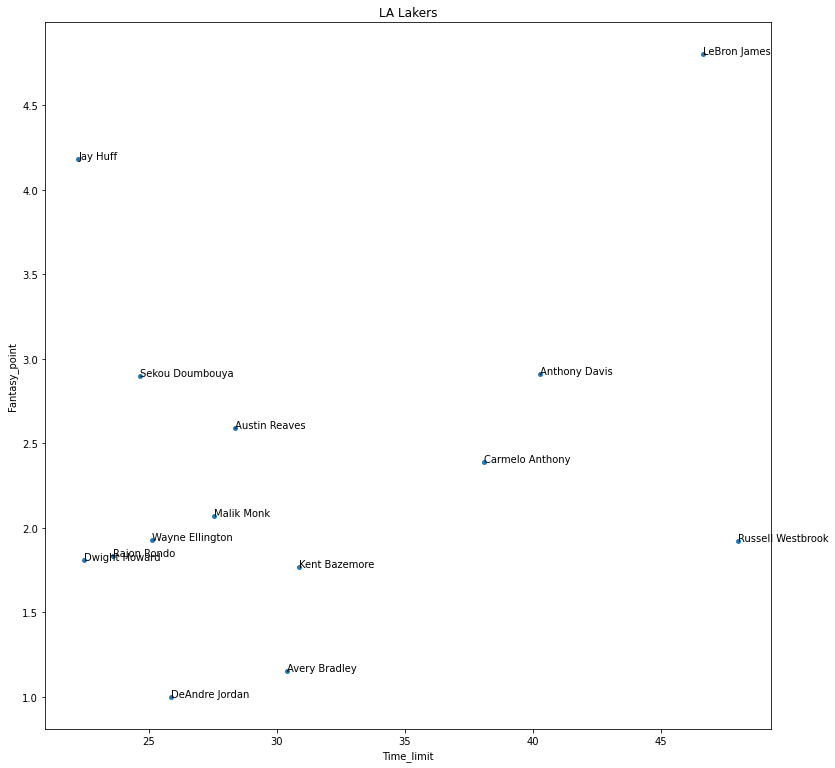

In [11]:
plt.figure(figsize=(13,13))
plt.title('LA Lakers')
plt.xlabel('Time_limit')
plt.ylabel('Fantasy_point')
x, y = LAL_player['Time_limit'], LAL_player['Fantasy_point']
plt.scatter(x, y, s=15)
for i, txt in enumerate(LAL_player['Player']):
    plt.annotate(txt, (x[i], y[i]))

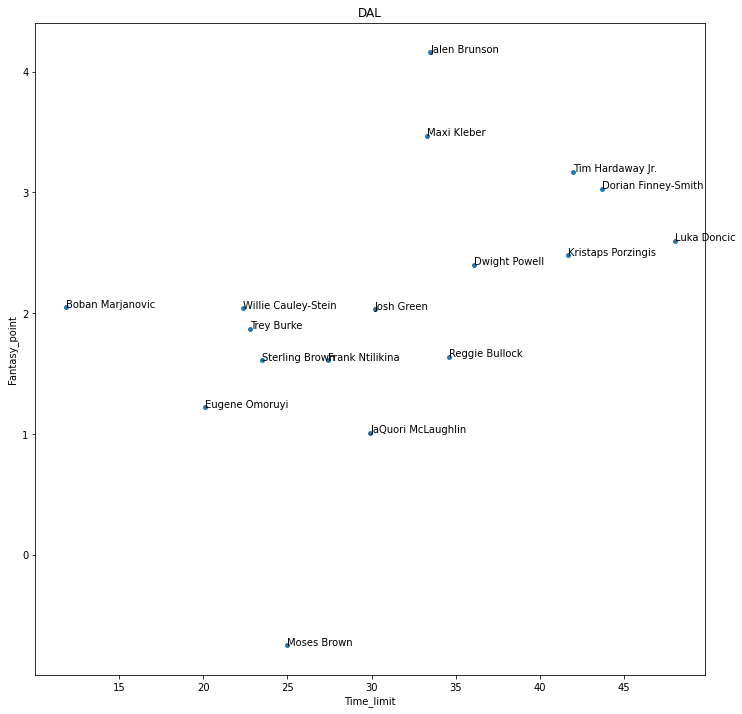

In [12]:
plt.figure(figsize=(12,12))
plt.title('DAL')
plt.xlabel('Time_limit')
plt.ylabel('Fantasy_point')
x, y = DAL_player['Time_limit'], DAL_player['Fantasy_point']
plt.scatter(x, y, s=15)
for i, txt in enumerate(DAL_player['Player']):
    plt.annotate(txt, (x[i], y[i]))

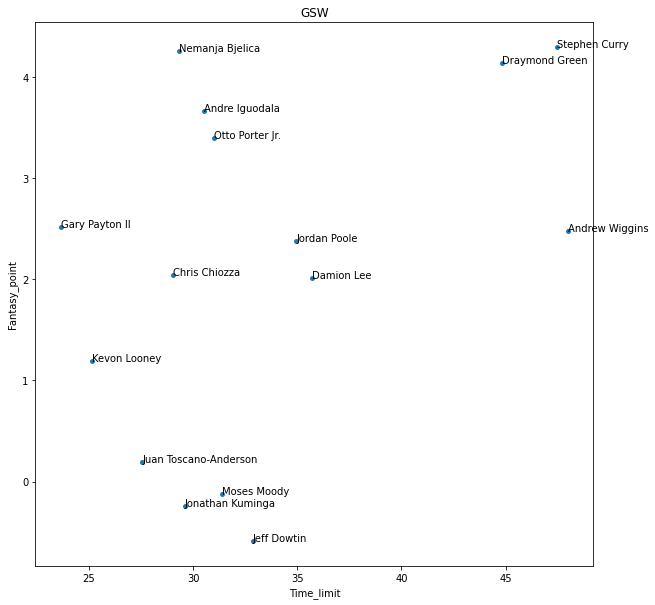

In [13]:
plt.figure(figsize=(10,10))
plt.title('GSW')
plt.xlabel('Time_limit')
plt.ylabel('Fantasy_point')
x, y = GSW_player['Time_limit'], GSW_player['Fantasy_point']
plt.scatter(x, y, s=15)
for i, txt in enumerate(GSW_player['Player']):
    plt.annotate(txt, (x[i], y[i]))